In [1]:
import os, sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir,'..')))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scorecardpy import woebin, woebin_plot, woebin_ply
from scripts.data_load import load_data

In [3]:
data = load_data("../data/woe_transformed_data.csv")

In [16]:
# Recency: Days since last transaction
data['recency'] = (pd.to_datetime('2025-01-28') - pd.to_datetime(data['TransactionStartTime'])).dt.days

# Frequency: Number of transactions
data['frequency'] = data.groupby('CustomerId')['TransactionId'].transform('count')

# Monetary: Total transaction amount
data['monetary'] = data.groupby('CustomerId')['Amount_woe'].transform('sum')

# Seasonality: Standard deviation of transaction amounts
data['seasonality'] = data.groupby('CustomerId')['TransactionStartTime'].transform(lambda x: pd.to_datetime(x).dt.month.std())

In [17]:
# Define RFMS Score: Higher is better
data['rfms_score'] = 0.25 * data['recency'] + 0.25 * data['frequency'] + \
                   0.25 * data['monetary'] + 0.25 * data['seasonality']

In [18]:
data['rfms_score'] 

0       -13459.347683
1       -13459.347683
2       -13459.347683
3       -13459.347683
4       -13459.347683
             ...     
95657   -13459.347683
95658   -13459.347683
95659   -13459.347683
95660   -13459.347683
95661   -13459.347683
Name: rfms_score, Length: 95662, dtype: float64

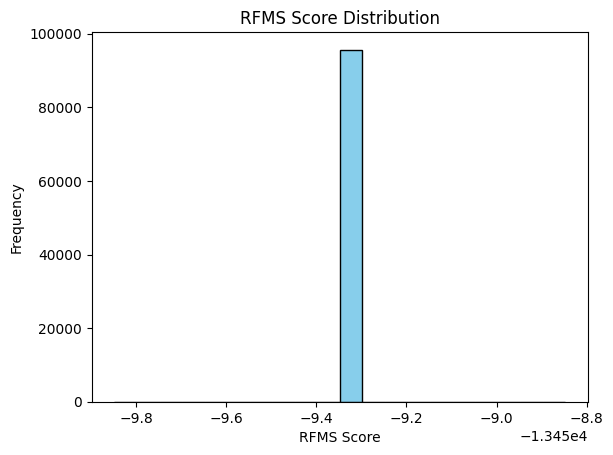

In [19]:
# Drop NaN values from rfms_score column
rfms_score_clean = data['rfms_score'].dropna()

plt.hist(rfms_score_clean, bins=20, color='skyblue', edgecolor='black')
plt.title('RFMS Score Distribution')
plt.xlabel('RFMS Score')
plt.ylabel('Frequency')
plt.show()

In [20]:
threshold = data['rfms_score'].median()
data['default_label'] = np.where(data['rfms_score'] >= threshold, 'good', 'bad')

In [29]:
# Check unique values in default_label column
unique_labels = data['default_label'].unique()
print(f"Unique values in default_label: {unique_labels}")

# Ensure default_label has both 'good' and 'bad' labels
if len(unique_labels) != 2:
	print("The default_label column does not have exactly two unique values. Please check the data.")
else:
	bins = woebin(data, y='default_label', x=['recency', 'frequency', 'monetary', 'seasonality'], positive='good')

Unique values in default_label: ['good']
The default_label column does not have exactly two unique values. Please check the data.
